This notebook shows how to draw water retention curve (WRC) and hydraulic conductivity function (HCF) using van-Genuchen-Mualem model:

\begin{equation}
  \label{eq:VGM_theta}
  \theta(\psi) = \theta_r + \frac{\theta_s - \theta_r}{(1+(-\alpha\psi)^n)^m},
\end{equation}

\begin{equation}
  \label{eq:VGM_K}
  K(\theta(\psi)) = K_sS_e^l(1-(1-S_e^{1/m})^m)^2,
\end{equation}

where $\theta_r$, $\theta_s$, $\alpha$, $n$, $K_s$, and $l$ are the Mualem-van Genuchen fitting parameters; $m = 1-1/n$; and the effective saturation $S_e$ is defined as

\begin{equation}
    \label{eq:effective_saturation}
    S_e = \frac{\theta - \theta_r}{\theta_s - \theta_r}.
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

The function below is used to set a fixed aspect ratio when drawing a plot in logarithmic scale using matplotlib.

In [2]:
def fixed_aspect_ratio_row(ratio):
    '''
    Set a fixed aspect ratio on matplotlib plots 
    regardless of axis units
    '''
    xvals,yvals = axs[row].get_xlim(),axs[row].get_ylim()

    xrange = xvals[1]-xvals[0]
    yrange = yvals[1]-yvals[0]
    axs[row].set_aspect(ratio*(xrange/yrange), adjustable='box')

In [3]:
def VGM_theta_K(psi, theta_r, theta_s, alpha, n, K_s, l):
    """
    this function calculates volumetric water content and hydraulic conductivity
    from matric potential (psi: negative) given VGM (van-Genuchen and Mualem model) parameters
    output: (theta, K)
    theta: volumetric water content
    K: hydraulic conductivity
    """
    m = 1 - 1/n
    S_e = (1 + (-alpha*psi)**n)**(-m)
    theta =  S_e * (theta_s - theta_r) + theta_r
    K = K_s*S_e**l*(1-(1-S_e**(1/m))**m)**2
    return theta, K

In [4]:
# VGM parameters(van Genuchen, 1980)
# theta_r, theta_s, alpha, n, K_s, l (units: cm, day)
VGM_parameters = {"sand": [0.045, 0.43, 0.145, 2.68, 712.8, 0.5],
                  "loam": [0.078, 0.43, 0.036, 1.56, 24.96, 0.5],
                  "clay": [0.068, 0.38, 0.008, 1.09, 4.8, 0.5]
                 }

Matric potential data are prepared here. By using np.arange funciton in logarithmic scale, equally spaced matric potential in logarithmic scale can be prepared.

In [5]:
log10_h = np.arange(0, 6, 0.1)  # logarithm of suction (negative matric potential) in cm
psi = -10**log10_h

In [6]:
for soil in ["sand", "loam", "clay"]:
    vars()['theta_VGM_'+ soil], vars()['K_VGM_'+ soil] = VGM_theta_K(psi, *VGM_parameters[soil])

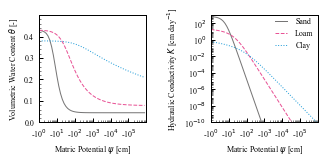

In [8]:
## water retention curve and hydraulic conductivity function for VGM model
fig, axs = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(5.0, 5/2), facecolor='none', edgecolor='#000000')

plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['font.size'] = 8 
plt.rcParams['axes.linewidth'] = 1

plt.subplots_adjust(wspace = 0.6)

row = 0

# volumetric water content data
theta_sand = vars()['theta_VGM_'+'sand']
theta_loam = vars()['theta_VGM_'+ 'loam']
theta_clay = vars()['theta_VGM_'+ 'clay']

# hydraulic conductivity data
log_K_sand = np.log10(vars()['K_VGM_'+ 'sand'])
log_K_loam = np.log10(vars()['K_VGM_'+ 'loam'])
log_K_clay = np.log10(vars()['K_VGM_'+ 'clay'])

# plotting water retention curve
axs[0].plot(log10_h, theta_sand, '-',color='#767575', linewidth=1,label='Sand')
axs[0].plot(log10_h, theta_loam, '--',color='#E85295', linewidth=1,label='Loam')
axs[0].plot(log10_h, theta_clay, ':',color='#229DD9', linewidth=1,label='Clay')

# x-axis
ticks_x = np.arange(-1, 6, 1)
ticklabels_x = [r"-10$^{{{}}}$".format(tick) for tick in ticks_x]
axs[0].set_xticks(ticks_x)
axs[0].set_xticklabels(ticklabels_x)

minor_ticks = []
for i in range(-1, 6):
    for j in range(2,10):
         minor_ticks.append(i+np.log10(j))

                    
axs[0].set_xticks(minor_ticks, minor=True)
axs[0].tick_params(axis='x', pad=5)

# y-axis
ticks_y = np.arange(0.0,0.5,0.1)
axs[0].set_yticks(ticks_y)

axs[0].tick_params(axis='y', pad=5)
axs[0].yaxis.set_minor_locator(AutoMinorLocator(5))

# tick parameters
axs[0].tick_params(axis = 'both', which = 'major', direction = 'in',size=4, width=1, color='#000000', labelsize=8)
axs[0].tick_params(axis = 'both', which = 'minor', direction = 'in',size=2,width=0.5, color='#000000', labelsize=8)

# limits for x and y axes
axs[0].set_xlim(0, 6)
axs[0].set_ylim(0.00,0.5)

# axes label
axs[0].set_xlabel('Matric Potential $\\psi$ [cm]', fontsize=8,color='#000000')
axs[0].set_ylabel('Volumetric Water Content $\\theta$ [-]', fontsize=8,color='#000000')
fixed_aspect_ratio_row(1.0)


row = 1

# plot hydraulic conductivity functions
axs[1].plot(log10_h, log_K_sand, '-',color='#767575', linewidth=1,label='Sand')
axs[1].plot(log10_h, log_K_loam, '--',color='#E85295', linewidth=1,label='Loam')
axs[1].plot(log10_h, log_K_clay, ':',color='#229DD9', linewidth=1,label='Clay')

# x-axis
ticks_x = np.arange(0, 6, 1)
ticklabels_x = [r"-10$^{{{}}}$".format(tick) for tick in ticks_x]
axs[1].set_xticks(ticks_x)
axs[1].set_xticklabels(ticklabels_x)

minor_ticks = []
for i in range(0, 6):
    for j in range(2,10):
         minor_ticks.append(i+np.log10(j))

                    
axs[1].set_xticks(minor_ticks, minor=True)
axs[1].tick_params(axis='x', pad=5)

# y-axis
ticks_y = np.arange(-10, 3, 2)
ticklabels_y = [r"10$^{{{}}}$".format(tick) for tick in ticks_y]
minor_ticks = []
for i in range(-10, 3):
    for j in range(2,10):
         minor_ticks.append(i+np.log10(j))
            
axs[1].set_yticks(ticks_y)
axs[1].set_yticks(minor_ticks, minor=True)
axs[1].set_yticklabels(ticklabels_y)
axs[1].tick_params(axis='y', pad=5)

# tick parameters
axs[1].tick_params(axis = 'both', which = 'major', direction = 'in',size=4, width=1, color='#000000', labelsize=8)
axs[1].tick_params(axis = 'both', which = 'minor', direction = 'in',size=2,width=0.5, color='#000000', labelsize=8)

# limits for x and y axes
axs[1].set_xlim(0, 6)
axs[1].set_ylim(-10, 3)


axs[1].set_xlabel('Matric Potential $\\psi$ [cm]', fontsize=8,color='#000000')
axs[1].set_ylabel('Hydraulic Conductivity $K$ [cm day$^{-1}$]', fontsize=8,color='#000000')
fixed_aspect_ratio_row(1.0)

axs[1].legend(loc = (0.55,0.65), numpoints=3,fontsize=8, facecolor = 'None', edgecolor = 'None')

# plt.savefig('VGM.pdf')
# plt.savefig('VGM.eps')
# plt.savefig('VGM.png', transparent = True)